# Data Science Challenge

In [1]:
# If you'd like to install packages that aren't installed by default, uncomment the last two lines of this cell and replace <package list> with a list of your packages.
# This will ensure your notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [3]:
#Libraries
import pandas as pd, numpy as np
pd.set_option("display.max_columns", 101)

In [5]:
import numpy as np                   
import pandas as pd                   
import matplotlib.pyplot as plt       
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

## Data Description

Column | Description
:---|:---
`id` | Unique id
`Daily Time Spent on Site` | Consumer time spent on site (in minutes)
`Age` | Consumer age (in years)
`Area Income` | Avg. Income of geographical area of consumer (in US $$)
`Daily Internet Usage` | Avg. minutes a day consumer is on the internet
`Ad Topic Line` | Headline of the advertisement
`gender` | Gender of the consumer
`Country` | Country of consumer
`Timestamp` | Timestamp at which consumer clicked on Ad or closed window (YYYY-MM-DD HH:MM:SS)
`Clicked` | Whether a consumer clicked on the advert or not (0: No ,1: Yes)

## Data Wrangling & Visualization

In [6]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [7]:
data.head()

,id,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country,Clicked
0,1200,2016-01-01 02:52:10,80.67,34,58909.36,239.76,Seamless impactful info-mediaries,0,Portugal,0
1,1201,2016-01-01 03:35:35,68.01,25,68357.96,188.32,Ameliorated actuating workforce,1,Afghanistan,0
2,1202,2016-01-01 05:31:22,80.94,36,60803.00,239.94,Self-enabling local strategy,0,Bermuda,0
3,1203,2016-01-01 08:27:06,78.77,28,63497.62,211.83,Public-key intangible Graphical User Interface,0,Guam,0
4,1204,2016-01-01 15:14:24,36.56,29,42838.29,195.89,Team-oriented bi-directional secured line,0,Uganda,1


In [8]:
#Explore columns
data.columns

Index(['id', 'Timestamp', 'Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'gender', 'Country',
       'Clicked'],
      dtype='object')

In [9]:
#Explore columns
data.dtypes

id                            int64
Timestamp                    object
Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
gender                        int64
Country                      object
Clicked                       int64
dtype: object

In [10]:
#Description
data.describe()

,id,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,gender,Clicked
count,1000.000000,1000.000000,1000.000000,775.000000,1000.000000,1000.000000,1000.000000
mean,1699.500000,65.120650,35.816000,55343.014555,179.592310,0.474000,0.503000
std,288.819436,15.781456,8.782669,13182.578667,43.735785,0.499573,0.500241
min,1200.000000,32.600000,19.000000,14548.060000,105.000000,0.000000,0.000000
25%,1449.750000,51.450000,29.000000,48270.620000,137.885000,0.000000,0.000000
50%,1699.500000,68.390000,35.000000,57737.510000,182.425000,0.000000,1.000000
75%,1949.250000,78.572500,41.250000,65207.185000,217.707500,1.000000,1.000000
max,2199.000000,91.370000,61.000000,79484.800000,269.960000,1.000000,1.000000


## The types of attrubutes in the given dataset

In [11]:
numeric_cols = ['id','Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','gender','Clicked']
categor_cols = ['Ad Topic Line', 'Country']

## Exploratory of the data: age

/Users/yulong/anaconda3/envs/hacker/lib/python3.9/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

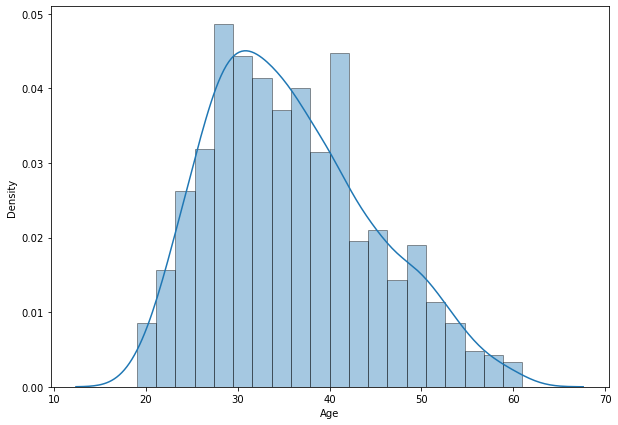

In [12]:
plt.figure(figsize=(10,7))
sns.distplot(data['Age'], bins = 20, kde=True, hist_kws=dict(edgecolor="k", linewidth=1))

> **Age: Mainly from 28 to 42, from 19 to 61, mean 35.**

In [13]:
print('Age max:', data['Age'].max(),'years old')
print('Age min:', data['Age'].min(),'years old')
print('Age mean:', data['Age'].mean(),'years old')

Age max: 61 years old
Age min: 19 years old
Age mean: 35.816 years old


## Exploratory of the data: Area Income

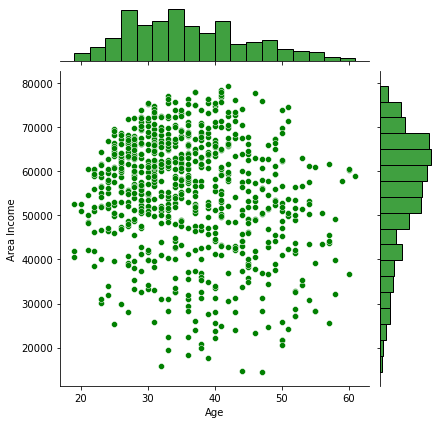

In [14]:
sns.jointplot(x='Age', y='Area Income', color= "green", data= data)

> **Most higher income are teenagers, about 25-45, and 50k-80k**

## Exploratory of the data: Daily Time Spent on Site

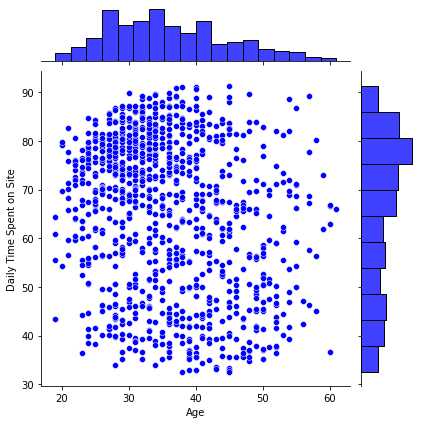

In [15]:
sns.jointplot(x='Age', y='Daily Time Spent on Site', color= "blue", data= data)

> **25-40 years old people is most active and also, they spend more than 1 hour.**

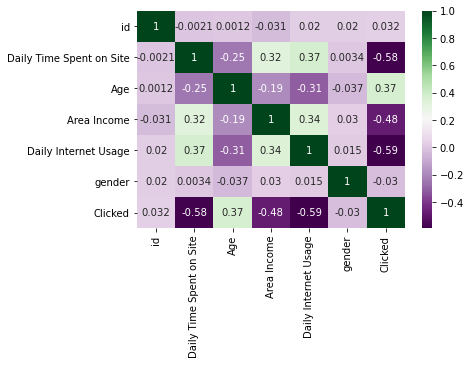

In [16]:
sns.heatmap(data.corr(), cmap='PRGn', annot=True);

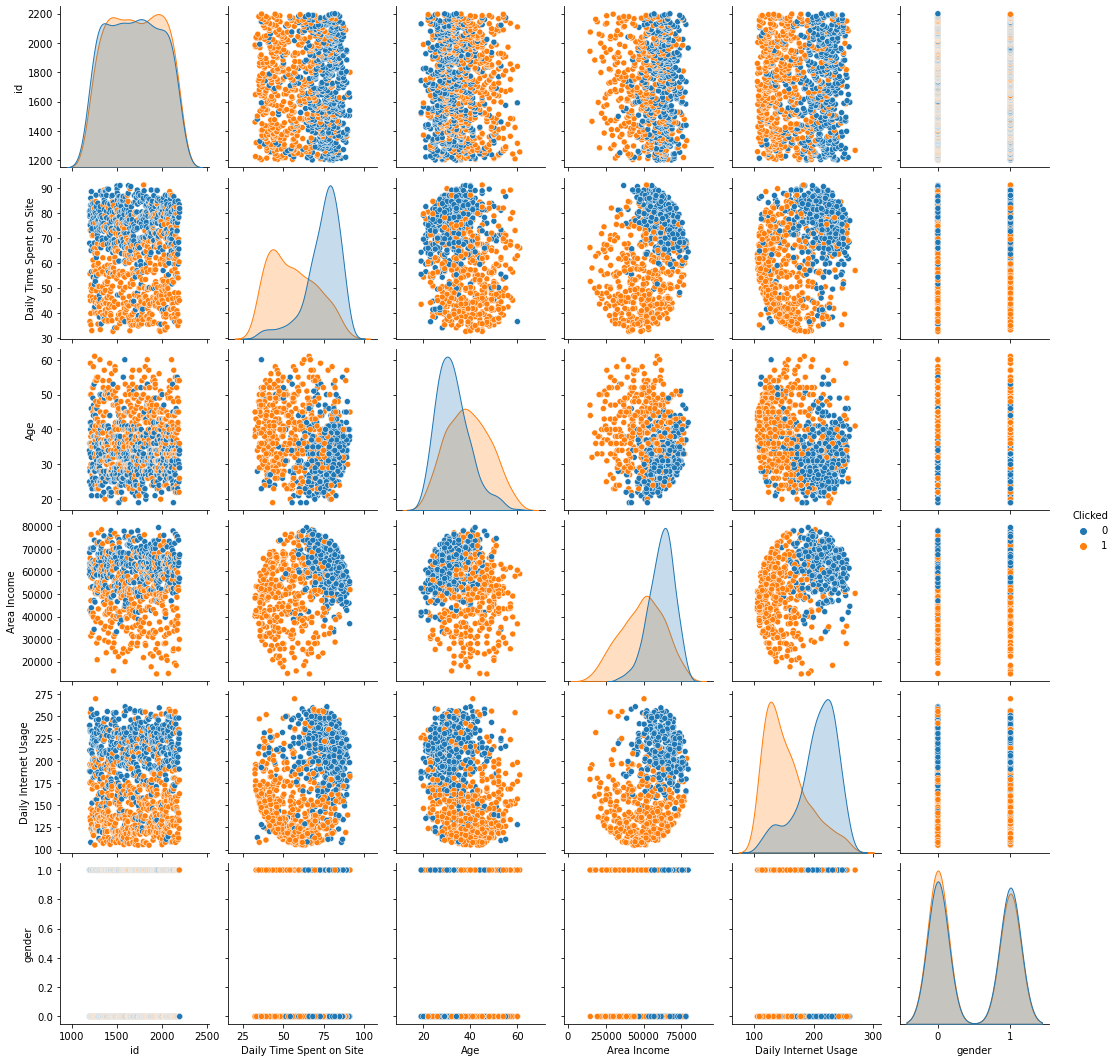

In [17]:
sns.pairplot(data, hue='Clicked')

> **no clear linear relationship found, daliy time spend on site and internet useage distribute varies, also genders.**

## Data clean: missing values

In [18]:
# make a copy of the orginal dataframe
df1 = data.copy()

In [19]:
# Check missing values
df1.isnull().sum()

id                            0
Timestamp                     0
Daily Time Spent on Site      0
Age                           0
Area Income                 225
Daily Internet Usage          0
Ad Topic Line                 0
gender                        0
Country                       0
Clicked                       0
dtype: int64

In [20]:
# size of data
df1.shape

(1000, 10)

> **income missing rate is 22.5%, but it seems important value, so we fill with the average data.**

In [21]:
df1['Area Income'].fillna((df1['Area Income'].mean()), inplace=True)

## Data clean: category values

* Ad Topic Line is no need to analysis, that work is related to the NLP, too complex to handle
* Country can be converted to numerical value
* Time stemp also, here we choose houly and monthly feathers for analysis.

In [22]:
df1.drop(['Ad Topic Line'], axis=1, inplace=True)
df1['Country Codes'] = df1['Country'].astype('category').cat.codes

In [23]:
df1[['Country Codes','Country']].head()

,Country Codes,Country
0,166,Portugal
1,0,Afghanistan
2,23,Bermuda
3,82,Guam
4,216,Uganda


In [24]:
df1['Month'] = df1['Timestamp'].apply(lambda x: x.split('-')[1])
df1['Hour'] = df1['Timestamp'].apply(lambda x: x.split(':')[0].split(' ')[1])

In [25]:
df1.drop(['Timestamp'], axis=1, inplace=True)
df1.drop(['Country'], axis=1, inplace=True)
df1.head()

,id,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,gender,Clicked,Country Codes,Month,Hour
0,1200,80.67,34,58909.36,239.76,0,0,166,01,02
1,1201,68.01,25,68357.96,188.32,1,0,0,01,03
2,1202,80.94,36,60803.00,239.94,0,0,23,01,05
3,1203,78.77,28,63497.62,211.83,0,0,82,01,08
4,1204,36.56,29,42838.29,195.89,0,1,216,01,15


## Visualization, Modeling, Machine Learning

Predict which users might click a particular advertisement.
Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model's performance will be evaluated on the basis of accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [26]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,Timestamp,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,gender,Country
0,2200,2016-06-04 17:24:07,43.88,54,31523.09,166.85,Enhanced methodical database,1,Somalia
1,2201,2016-06-05 00:29:13,66.40,40,77567.85,214.42,Digitized heuristic solution,0,Antigua and Barbuda
2,2202,2016-06-05 00:29:13,79.52,34,NaN,141.58,Customer-focused 24/7 concept,0,United States of America
3,2203,2016-06-05 07:54:30,52.35,25,33293.78,147.61,Mandatory 4thgeneration structure,1,Mali
4,2204,2016-06-05 07:54:30,81.51,36,NaN,195.93,Monitored local Internet solution,0,Croatia


In [27]:
# Create a copy of test dataframe
tdf = test_data.copy()

# step1 fill missing values
tdf['Area Income'].fillna((tdf['Area Income'].mean()), inplace=True)

# step2 country to code
tdf['Country Codes'] = tdf['Country'].astype('category').cat.codes

# step3 split time stamp to montly and hourly data
tdf['Month'] = tdf['Timestamp'].apply(lambda x: x.split('-')[1])
tdf['Hour'] = tdf['Timestamp'].apply(lambda x: x.split(':')[0].split(' ')[1])

# step4 drop data
tdf.drop(['Ad Topic Line'], axis=1, inplace=True)
tdf.drop(['Timestamp'], axis=1, inplace=True)
tdf.drop(['Country'], axis=1, inplace=True)

# Show the first 5 rows of tdf
tdf.head()

,id,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,gender,Country Codes,Month,Hour
0,2200,43.88,54,31523.090000,166.85,1,126,06,17
1,2201,66.40,40,77567.850000,214.42,0,7,06,00
2,2202,79.52,34,53818.505778,141.58,0,151,06,00
3,2203,52.35,25,33293.780000,147.61,1,87,06,07
4,2204,81.51,36,53818.505778,195.93,0,37,06,07


## try models 

In [28]:
# Create outcome and input DataFrames
df2 = df1.copy()
y = df2['Clicked'] 
X = df2.drop('Clicked', axis=1)
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Clicked, dtype: int64

In [29]:
X_train, X_test, Y_train, Y_test= train_test_split(X, y,test_size=0.3,
                                                  random_state = 0)

In [30]:
#Logistic Regression Model
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, Y_train)
log_reg_pred = log_reg_model.predict(X_test)
log_reg_accuracy = accuracy_score(log_reg_pred, Y_test)
print(log_reg_accuracy*100)

79.33333333333333


In [31]:
#Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
nav_bayes_model = GaussianNB()
nav_bayes_model.fit(X_train, Y_train)
nav_bayes_pred = nav_bayes_model.predict(X_test)
nav_bayes_accuracy = accuracy_score(nav_bayes_pred, Y_test)
print(nav_bayes_accuracy*100)

84.33333333333334


In [32]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dec_tree_model = DecisionTreeClassifier()
dec_tree_model.fit(X_train, Y_train)
dec_tree_pred = dec_tree_model.predict(X_test)
dec_tree_accuracy = accuracy_score(dec_tree_pred, Y_test)
print(dec_tree_accuracy*100);

80.66666666666666


In [50]:
# rf with grid search
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth' : (5,6,7)
              ,'max_features' : (2,3,4)
              ,'min_samples_leaf' : (1, 2)
              ,'min_samples_split' : (4, 5, 6)
              ,'n_estimators' : (30, 40, 50)}
rf1 = GridSearchCV(RandomForestRegressor(
                     n_jobs=-1,
                     criterion = 'mae', 
                     random_state = 33, 
                     oob_score = False),
                   param_grid = parameters,
                   cv =4,
                   verbose = True)

In [51]:
rf1_model = rf1.fit(X_train, Y_train)

Fitting 4 folds for each of 162 candidates, totalling 648 fits


In [52]:
rf1_model.best_estimator_

RandomForestRegressor(criterion='mae', max_depth=6, max_features=3,
                      min_samples_split=5, n_estimators=40, n_jobs=-1,
                      random_state=33)

In [53]:
rf1_model.best_score_

0.5679629588139155

In [54]:
rf1_model.best_params_

{'max_depth': 6,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 40}

In [55]:
rf = RandomForestRegressor(criterion = 'mae'
                           , random_state = 33
                           , max_depth=6
                           , max_features=3
                           , min_samples_leaf=1
                           , min_samples_split=5
                           , n_estimators=40)

rf.fit(X_train, Y_train)

RandomForestRegressor(criterion='mae', max_depth=6, max_features=3,
                      min_samples_split=5, n_estimators=40, random_state=33)

In [56]:
y_test = rf.predict(tdf)
#np.round(y_test)

In [57]:
accuracy = accuracy_score(np.round(y_test), Y_test)
print(accuracy*100)

48.0


> **choose the Naive Bayes Model with a score of 84.3**



**Describe the most important features in the model to a management audience.**

> #### Task:
- **Visualize the top 10 features and their feature importance.**


**The GaussianNB does not offer an intrinsic method to evaluate feature importances.**

In [58]:
from sklearn.inspection import permutation_importance
imps = permutation_importance(nav_bayes_model, X_test, y_test)
print(imps.importances_mean)

ValueError: Classification metrics can't handle a mix of continuous and binary targets

> **import package problem, time is limited, use the random forest to extract feature importances**

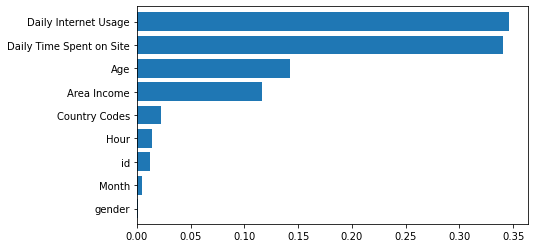

In [59]:
# Extract feature importance determined by RF model
feature_imp = pd.Series(rf.feature_importances_, index=X.columns)
feature_imp.sort_values(ascending=True, inplace=True)

# Creating a bar plot
feature_imp.plot(kind='barh', width=0.8, figsize=(7,4));

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict whether a consumer clicked on an ad or not. Submit a CSV file with a header row and one row per test entry. 
    
The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **Clicked**

In [36]:
# Create a submission_df
d = {'id': test_data.index, 'Clicked': nav_bayes_pred}
submission_df = pd.DataFrame(data=d)
submission_df

,id,Clicked
0,0,1
1,1,1
2,2,1
3,3,0
4,4,0
...,...,...
295,295,0
296,296,0
297,297,0
298,298,1


In [37]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---